In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
titanic_data = pd.read_csv('train.csv')

In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


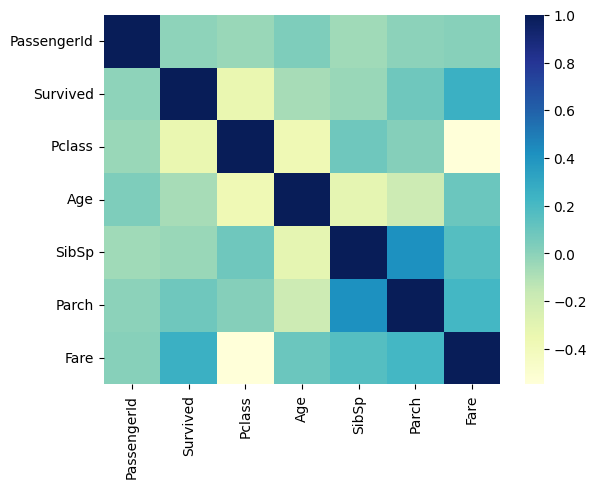

In [18]:
import seaborn as sns

sns.heatmap(titanic_data.corr(numeric_only = True), cmap="YlGnBu")
plt.show()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

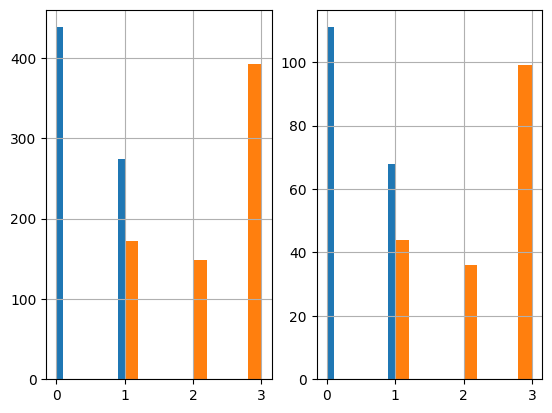

In [24]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [25]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 663 to 763
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          574 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [35]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X["Age"] = imputer.fit_transform(X[['Age']])
        return X

In [36]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_names = ["C", "S", "Q", "N"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[['Sex']]).toarray()

        column_names = ["Female", "Male"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X


In [37]:
class FeatureDropper (BaseEstimator, TransformerMixin):
    
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(("Embarked", "Name", "Ticket", "Cabin", "Sex", "N"), axis=1, errors="ignore")

In [38]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("ageimputer", AgeImputer()),
    ("featureencoder", FeatureEncoder()),
    ("featuredropper", FeatureDropper())
])

In [40]:
strat_train_set = pipeline.fit_transform(strat_train_set)
strat_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,S,Q,N,Female,Male
663,664,0,3,"Coleff, Mr. Peju",male,36.000000,0,0,349210,7.4958,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.214007,1,0,17453,89.1042,C92,C,1.0,0.0,0.0,0.0,1.0,0.0
651,652,1,2,"Doling, Miss. Elsie",female,18.000000,0,1,231919,23.0000,NaN,S,0.0,0.0,1.0,0.0,1.0,0.0
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.000000,4,2,347077,31.3875,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
714,715,0,2,"Greenberg, Mr. Samuel",male,52.000000,0,0,250647,13.0000,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,0,3,"Lefebre, Miss. Mathilde",female,29.214007,3,1,4133,25.4667,NaN,S,0.0,0.0,1.0,0.0,1.0,0.0
47,48,1,3,"O'Driscoll, Miss. Bridget",female,29.214007,0,0,14311,7.7500,NaN,Q,0.0,1.0,0.0,0.0,1.0,0.0
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.000000,0,0,350042,7.7958,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.000000,1,0,STON/O2. 3101279,15.8500,NaN,S,0.0,0.0,1.0,0.0,1.0,0.0


In [41]:
strat_train_set.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
663          664         0       3   
849          850         1       1   
651          652         1       2   
182          183         0       3   
714          715         0       2   
..           ...       ...     ...   
229          230         0       3   
47            48         1       3   
756          757         0       3   
142          143         1       3   
763          764         1       1   

                                                  Name     Sex        Age  \
663                                   Coleff, Mr. Peju    male  36.000000   
849       Goldenberg, Mrs. Samuel L (Edwiga Grabowska)  female  29.214007   
651                                Doling, Miss. Elsie  female  18.000000   
182              Asplund, Master. Clarence Gustaf Hugo    male   9.000000   
714                              Greenberg, Mr. Samuel    male  52.000000   
..                                               